In [1]:
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.checkpoint.memory import InMemorySaver

from langchain_openai import ChatOpenAI
from langchain_core.messages.utils import trim_messages, count_tokens_approximately

from dotenv import load_dotenv 

In [2]:
load_dotenv()

True

In [3]:
model = ChatOpenAI()

In [4]:
MAX_TOKENS = 150

In [5]:
# define chat node with message trimming

def call_model(state: MessagesState):
    
    # Trim conversation history -> Last N messages that fit within the token budget
    messages = trim_messages(
        state['messages'],
        strategy='last',
        token_counter=count_tokens_approximately,
        max_tokens=MAX_TOKENS
    )
    
    print(f"Current Token Count: {count_tokens_approximately(messages=messages)}")
    
    for message in messages:
        print(message.content)
    
    response = model.invoke(messages)
    
    return {"messages": [response]}

In [6]:
builder = StateGraph(MessagesState)

builder.add_node("call_model", call_model)

builder.add_edge(START, "call_model")
builder.add_edge("call_model", END)

checkpointer = InMemorySaver()

graph = builder.compile(checkpointer=checkpointer)

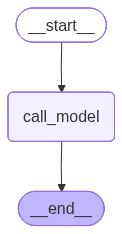

In [7]:
graph

In [8]:
config = {"configurable": {"thread_id": "chat_1"}}

result = graph.invoke(
    {
        "messages": [{"role": "user", "content": "Hi, My name is Shreyas"}]
    }, config=config
)

result["messages"][-1].content

Current Token Count: 10
Hi, My name is Shreyas


'Hello Shreyas! How can I assist you today?'

In [9]:
result = graph.invoke(
    {
        "messages": [{"role": "user", "content": "I am learning LangGraph"}]
    }, config=config
)

result["messages"][-1].content

Current Token Count: 36
Hi, My name is Shreyas
Hello Shreyas! How can I assist you today?
I am learning LangGraph


"That's great to hear! LangGraph is a powerful tool for natural language processing and understanding. If you have any specific questions or need help with something related to LangGraph, feel free to ask and I'll do my best to assist you."

In [10]:
result = graph.invoke(
    {
        "messages": [{"role": "user", "content": "can you explain Short Term Memory in the context of LangGraph?"}]
    }, config=config
)

result["messages"][-1].content

Current Token Count: 121
Hi, My name is Shreyas
Hello Shreyas! How can I assist you today?
I am learning LangGraph
That's great to hear! LangGraph is a powerful tool for natural language processing and understanding. If you have any specific questions or need help with something related to LangGraph, feel free to ask and I'll do my best to assist you.
can you explain Short Term Memory in the context of LangGraph?


"In the context of LangGraph, Short Term Memory (STM) refers to the temporary storage and processing of information within the neural network architecture. STM is a crucial component of the language model as it helps the model capture dependencies and relationships between words in a sentence.\n\nWhen processing a sentence, the LangGraph model uses Short Term Memory to keep track of words and their embeddings within a defined window of tokens. This allows the model to consider the context of each word in relation to its neighbors and make more accurate predictions.\n\nOverall, Short Term Memory in LangGraph plays a vital role in improving the model's ability to understand and generate natural language text. It helps in capturing sequential patterns and dependencies, enabling the model to generate coherent and contextually relevant responses."

In [14]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "What is my name?"}]},
    config,
)

result["messages"][-1].content

Current Token Count: 37
What is my name?
I'm sorry, I do not know your name as I am a digital assistant.
What is my name?


"I'm sorry, but as a digital assistant, I do not have the ability to know your name."